## Dataset Exploration:
1. Importing the dataset

In [1]:
# IMPORTS:
import os
import pandas as pd
import numpy as np

In [2]:
raw_dataset = pd.read_excel("../data/DBF.xlsx")
raw_dataset.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,T
0,12800,36,0.1199,C,6,MORTGAGE,53000.0,1,credit_card,0.2099,1095
1,5625,36,0.1825,D,10,MORTGAGE,53328.0,1,home_improvement,0.1051,1095
2,12025,36,0.1446,C,2,MORTGAGE,32000.0,1,debt_consolidation,0.1988,1095
3,9000,36,0.1531,C,9,RENT,52000.0,1,debt_consolidation,0.1886,1095
4,8000,36,0.1075,B,5,RENT,73000.0,1,debt_consolidation,0.1085,1095


### **Columns Overview**
1. loan_amnt [Xi]: Loan amount requested by the borrower.
2. term: The term of the loan in months (36 or 60).
3. int_rate: Interest rate on the loan.
4. grade: Grade assigned to the loan (A, B, C, D, etc.), typically based on creditworthiness.
5. emp_length: Number of years the borrower has been employed.
6. home_ownership: Home ownership status (e.g., MORTGAGE, RENT, OWN).
7. annual_inc: Annual income of the borrower.
8. loan_status: Loan status (1 indicates current loans in this sample).
9. purpose: Purpose of the loan (e.g., credit_card, home_improvement, debt_consolidation).
10. dti: Debt-to-income ratio.
11. T: Loan term in days (possibly derived from the 'term' column).

In [3]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527428 entries, 0 to 527427
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_amnt       527428 non-null  int64  
 1   term            527428 non-null  int64  
 2   int_rate        527428 non-null  float64
 3   grade           527428 non-null  object 
 4   emp_length      527428 non-null  int64  
 5   home_ownership  527428 non-null  object 
 6   annual_inc      527428 non-null  float64
 7   loan_status     527428 non-null  int64  
 8   purpose         527428 non-null  object 
 9   dti             527428 non-null  float64
 10  T               527428 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 44.3+ MB


In [4]:
raw_dataset.describe(exclude='object').transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,527428.0,14798.364327,9334.435778,1000.0000,7500.0000,12000.0000,20000.0000,4.000000e+04
term,527428.0,41.641202,10.176733,36.0000,36.0000,36.0000,36.0000,6.000000e+01
int_rate,527428.0,0.134604,0.053293,0.0531,0.0975,0.1274,0.1602,3.099000e-01
emp_length,527428.0,6.009531,3.606430,1.0000,2.0000,6.0000,10.0000,1.000000e+01
annual_inc,527428.0,81105.460820,79271.565072,32.0000,50000.0000,69000.0000,96000.0000,1.099920e+07
loan_status,527428.0,0.744828,0.435958,0.0000,0.0000,1.0000,1.0000,1.000000e+00
dti,527428.0,0.185749,0.117212,-0.0100,0.1179,0.1775,0.2445,9.990000e+00
T,527428.0,1267.225739,309.797846,1095.0000,1095.0000,1096.0000,1096.0000,1.827000e+03


In [5]:
raw_dataset.describe(include='object').transpose()

,count,unique,top,freq
grade,527428,7,C,160021
home_ownership,527428,5,MORTGAGE,259852
purpose,527428,13,debt_consolidation,298735


In [6]:
numerical_features = raw_dataset.select_dtypes(include=['int64', 'float64'])
categorical_features = raw_dataset.select_dtypes(include=['object'])

### Analysing the categorical variables:

In [10]:
for col in categorical_features:
    print(f"\n'{col}' value counts:\n{categorical_features[col].value_counts()}")


'grade' value counts:
grade
C    160021
B    152195
A     89336
D     77312
E     32674
F     11521
G      4369
Name: count, dtype: int64

'home_ownership' value counts:
home_ownership
MORTGAGE    259852
RENT        206170
OWN          61111
ANY            293
NONE             2
Name: count, dtype: int64

'purpose' value counts:
purpose
debt_consolidation    298735
credit_card           106174
home_improvement       39249
other                  37385
major_purchase         13540
medical                 7253
car                     6149
small_business          6070
vacation                4393
moving                  4308
house                   3789
renewable_energy         380
wedding                    3
Name: count, dtype: int64


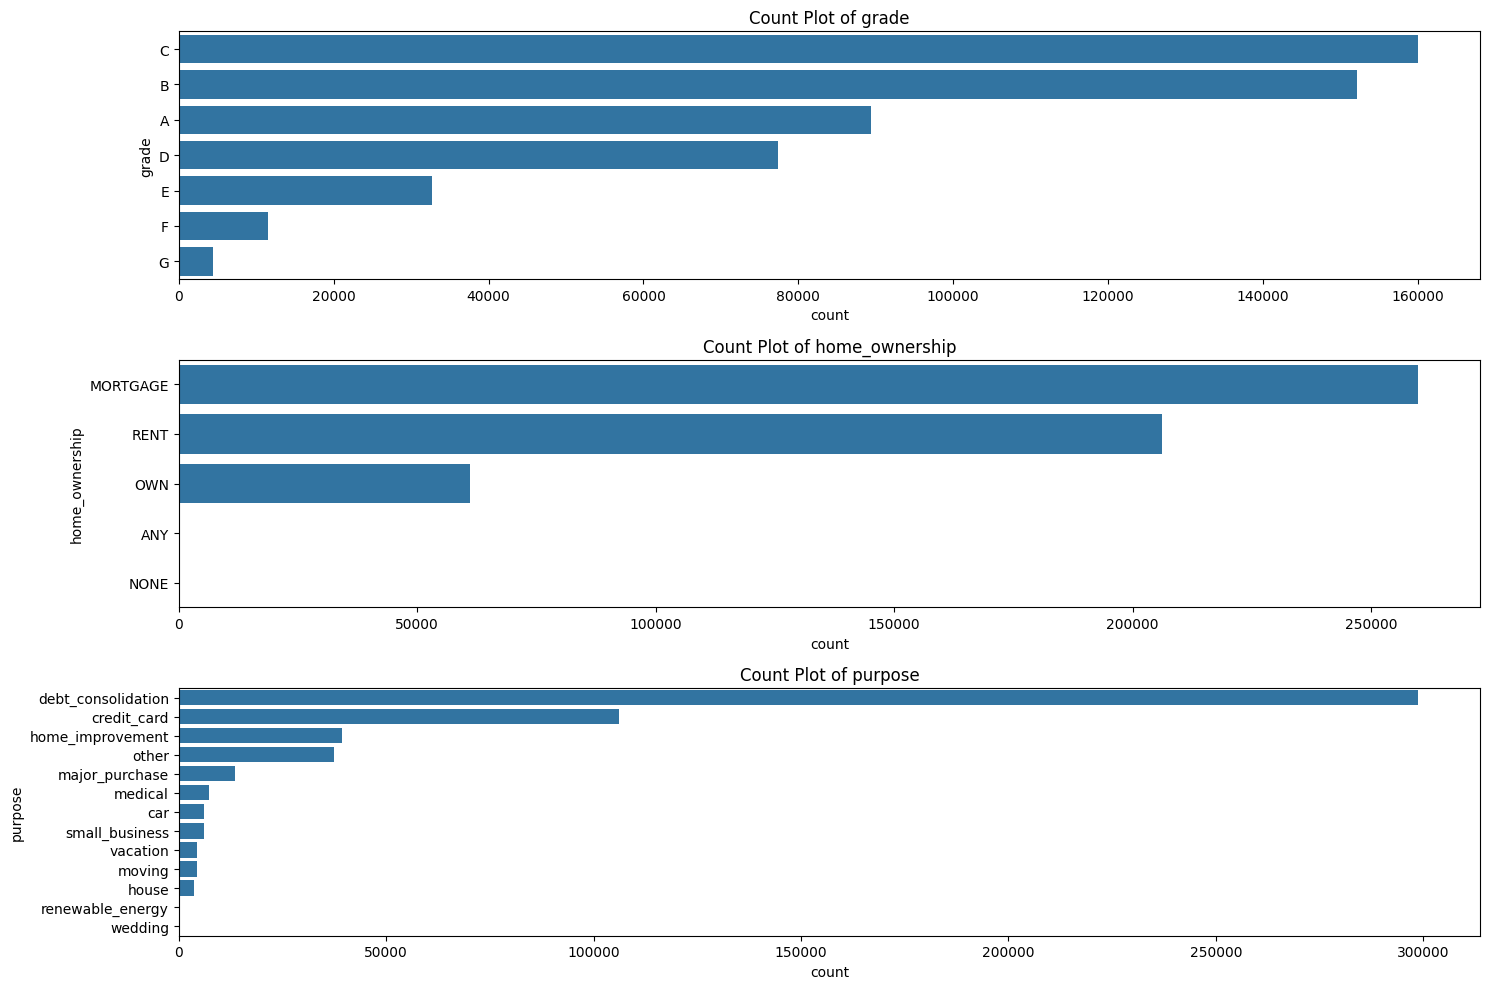

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


# categorical_features = raw_dataset.select_dtypes(include=['object'])

plt.figure(figsize=(15, 10))

# Count plots:
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 1, i)
    sns.countplot(y=col, data=categorical_features, order=categorical_features[col].value_counts().index)
    plt.title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

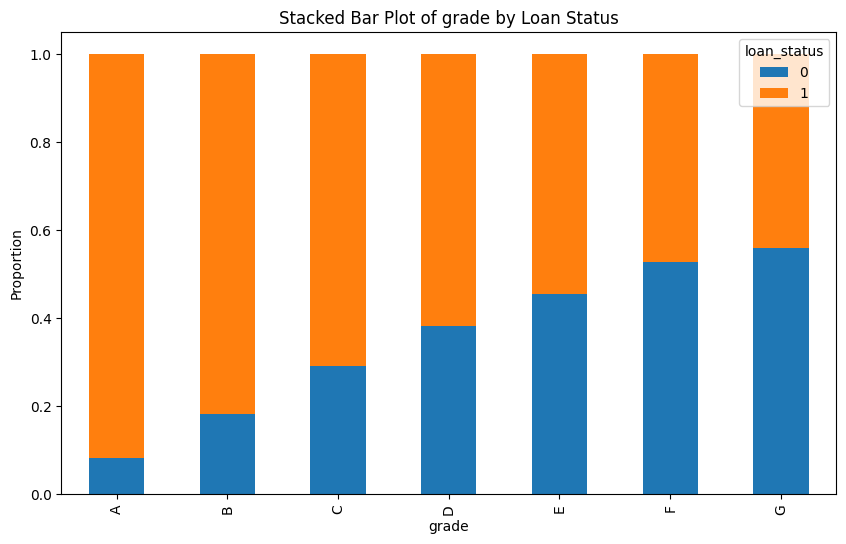

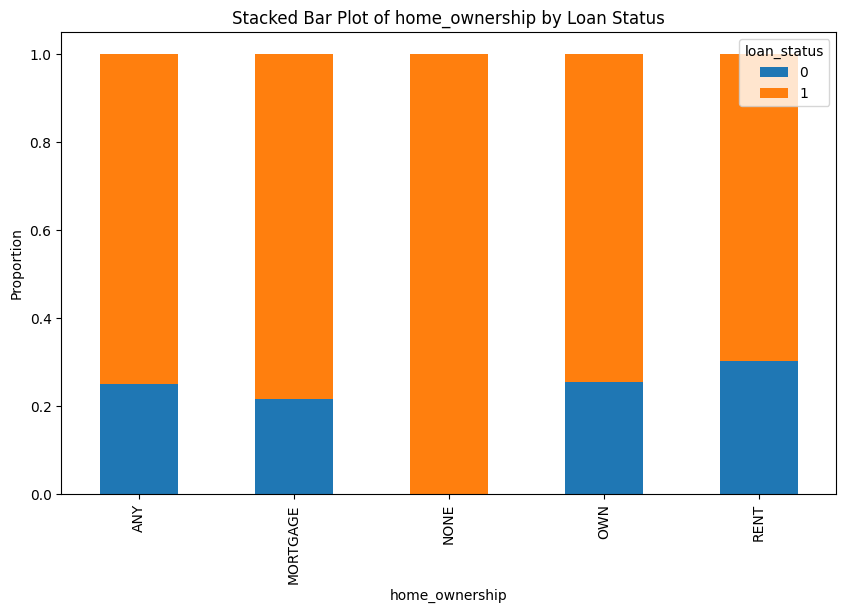

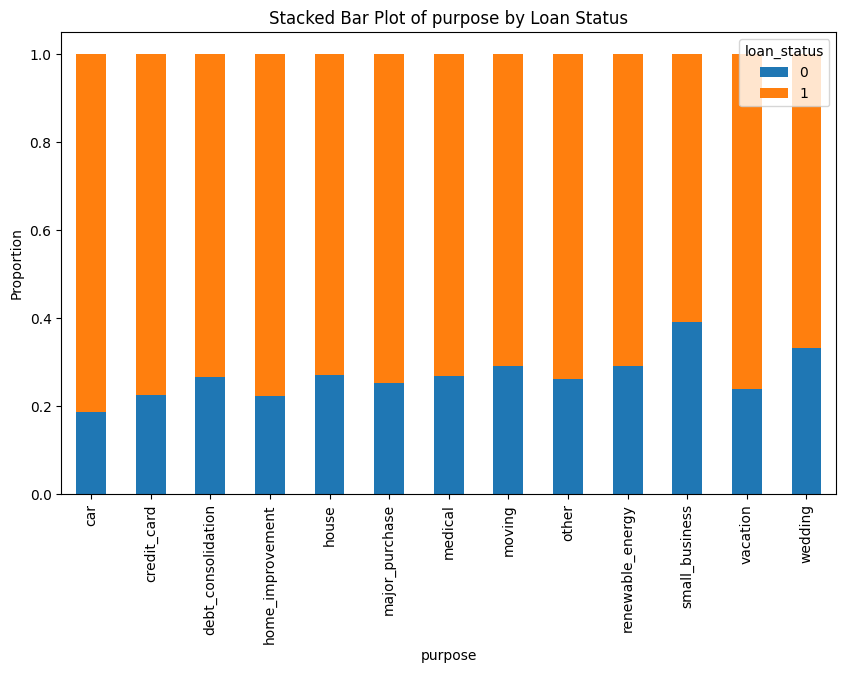

In [23]:
# Stacked bar plots
for col in categorical_features:
    cross_tab = pd.crosstab(categorical_features[col], raw_dataset['loan_status'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Stacked Bar Plot of {col} by Loan Status')
    plt.ylabel('Proportion')
    plt.show()

♦ Delete the rows where 'home_ownership' = ANY/NONE. Encode the rest the column after.

In [21]:
# Frequency distribution:
for col in categorical_features:
    print(f"\nFrequency distribution for '{col}' variable:")
    print(pd.crosstab(categorical_features[col], raw_dataset['loan_status']))


Frequency distribution for 'grade' variable:
loan_status      0       1
grade                     
A             7398   81938
B            27751  124444
C            46486  113535
D            29597   47715
E            14838   17836
F             6072    5449
G             2443    1926

Frequency distribution for 'home_ownership' variable:
loan_status         0       1
home_ownership               
ANY                73     220
MORTGAGE        56408  203444
NONE                0       2
OWN             15537   45574
RENT            62567  143603

Frequency distribution for 'purpose' variable:
loan_status             0       1
purpose                          
car                  1148    5001
credit_card         23893   82281
debt_consolidation  79882  218853
home_improvement     8723   30526
house                1024    2765
major_purchase       3435   10105
medical              1942    5311
moving               1254    3054
other                9752   27633
renewable_energy      11

In [24]:
#Chi-square test:
from scipy.stats import chi2_contingency

for col in categorical_features:
    crosstab = pd.crosstab(categorical_features[col], raw_dataset['loan_status'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"\nChi-square statistics for '{col}' variable:")
    print(f"\nChi2: {chi2}, p-value: {p}\n")


Chi-square statistics for 'grade' variable:

Chi2: 39300.74393852338, p-value: 0.0


Chi-square statistics for 'home_ownership' variable:

Chi2: 4515.848462166221, p-value: 0.0


Chi-square statistics for 'purpose' variable:

Chi2: 1755.9373788251298, p-value: 0.0



♦ The **high Chi2 values** and respectively **low p-values** shows that there is a significant association  between the three categorical variable ('grade', 'home_ownership', 'purpose') and the target variable 'loan-status' which means that these variables must be included in the model.

♦ These categorical variables, 'grade' and 'home_ownership', have a small number of unique values, we can apply **One-Hot Encoding** since it is a more straightforward approach.

♦ The 'purpose' categorical variable exhibits a high cardinality thus we may opt for either **Target Encoding** or **Frequency Encoding**.

♦ **Target encoding** replaces each category with the mean value of the target variable for that category, while **frequency encoding** uses the frequency of each category.

## **Analysing the numerical variables**

In [27]:
print("Summary Statistics:")
numerical_features.describe().transpose()

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
loan_amnt,527428.0,14798.364327,9334.435778,1000.0000,7500.0000,12000.0000,20000.0000,4.000000e+04
term,527428.0,41.641202,10.176733,36.0000,36.0000,36.0000,36.0000,6.000000e+01
int_rate,527428.0,0.134604,0.053293,0.0531,0.0975,0.1274,0.1602,3.099000e-01
emp_length,527428.0,6.009531,3.606430,1.0000,2.0000,6.0000,10.0000,1.000000e+01
annual_inc,527428.0,81105.460820,79271.565072,32.0000,50000.0000,69000.0000,96000.0000,1.099920e+07
loan_status,527428.0,0.744828,0.435958,0.0000,0.0000,1.0000,1.0000,1.000000e+00
dti,527428.0,0.185749,0.117212,-0.0100,0.1179,0.1775,0.2445,9.990000e+00
T,527428.0,1267.225739,309.797846,1095.0000,1095.0000,1096.0000,1096.0000,1.827000e+03


### **Observations**:
***
1. **loan_amnt**: The loan amount requested by the borrower.

* Insights: It ranges from 1,000(USD) to 40,000(USD), with a mean of about 14,798(USD).
* Potential Actions: Standardization to scale the values.

2. **term**: The number of payments on the loan (in months).

* Insights: It has two unique values, 36 and 60 months.
* Potential Actions: Transform into a categorical variable.

3. **int_rate**: The interest rate on the loan.

* Insights: Ranges from 5.31% to 30.99%, with a mean of 13.46%.
* Potential Actions: Standardization.

4. **emp_length**: The number of years the borrower has been employed.

* Insights: Ranges from 1 to 10 years, with a mean of about 6 years.
* Potential Actions: standardization.

5. **annual_inc**: The annual income of the borrower.

* Insights: The distribution is right-skewed with a mean of $81,105.
* Potential Actions: Log transformation to reduce skewness, standardization.

6. **loan_status**: The target variable (0 or 1).

* Insights: Binary variable indicating the loan status.
* Potential Actions: No preprocessing needed.

7. **dti**: Debt-to-income ratio.

* Insights: The range is from -0.01 to 9.99, with a mean of 0.186.
* Potential Actions: Handle negative values (if they are errors), standardization.

8. **T**: This column is unclear but seems to have a fixed range (likely representing time).

* Insights: Ranges from 1,095 to 1,827, with a mean of 1,267.
* Potential Actions: Standardization.

We need to perform the preprocessing tasks: <br>
<br>
♦ **Standardization**: Scale {'loan_amnt', 'int_rate', 'emp_lenght', 'dti', 'T'} to have a mean of 0 and a standard deviation of 1. <br>
♦ **Log Transformation**: Apply log transformation to annual_inc to reduce skewness. <br>
♦ **Outlier Handling**: Detect and handle outliers, particularly in annual_inc and dti. <br>
♦ **Negative Values**: Address negative values in dti. <br>
<br>
***

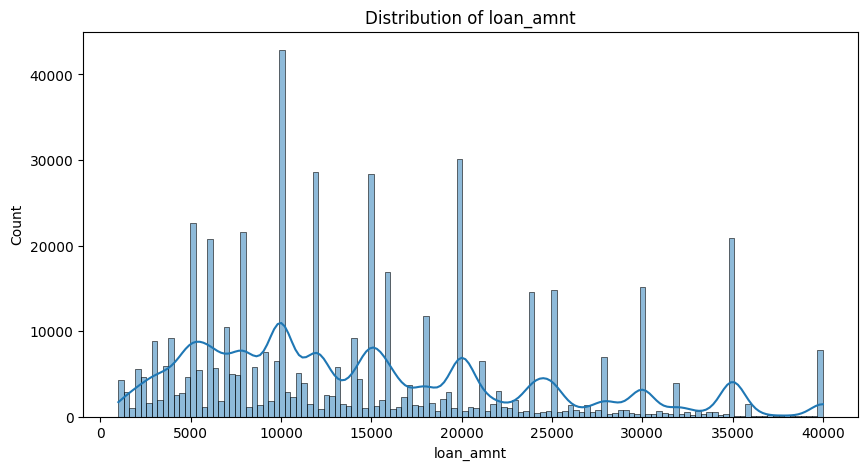

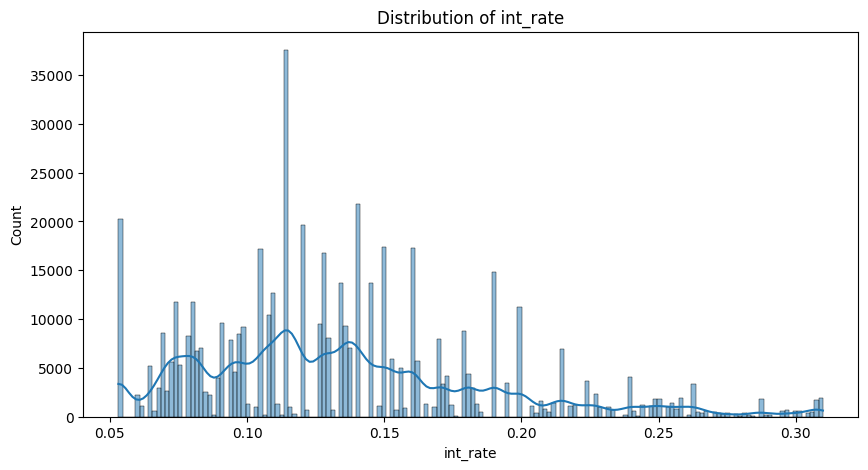

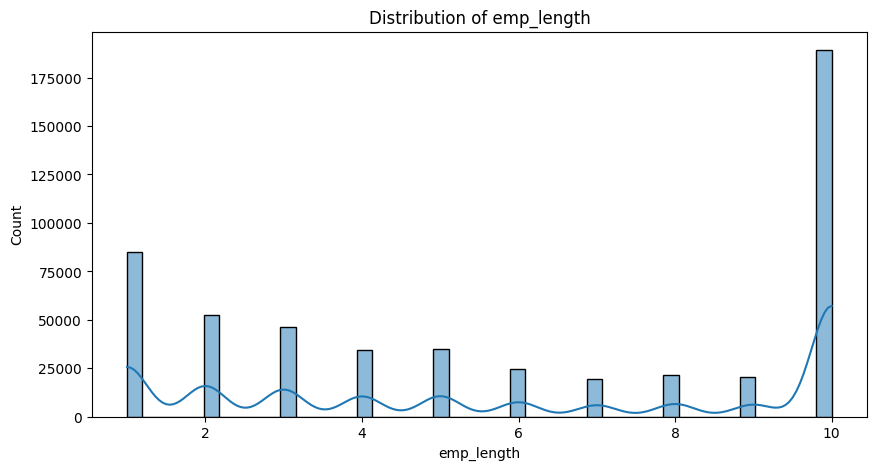

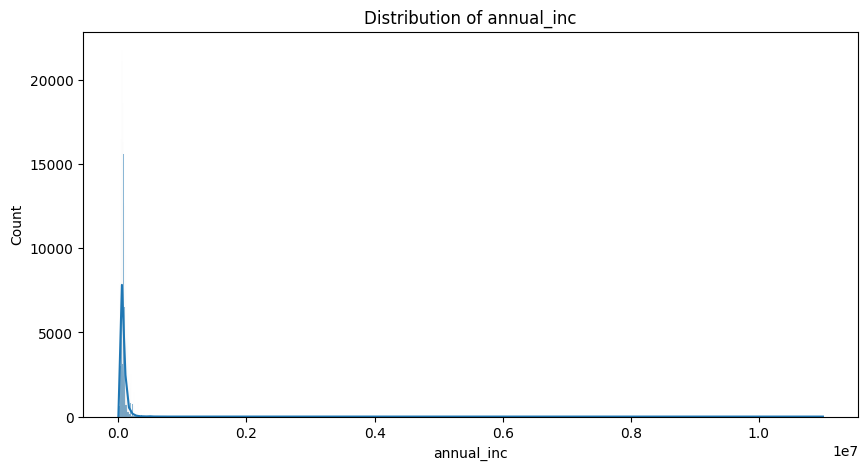

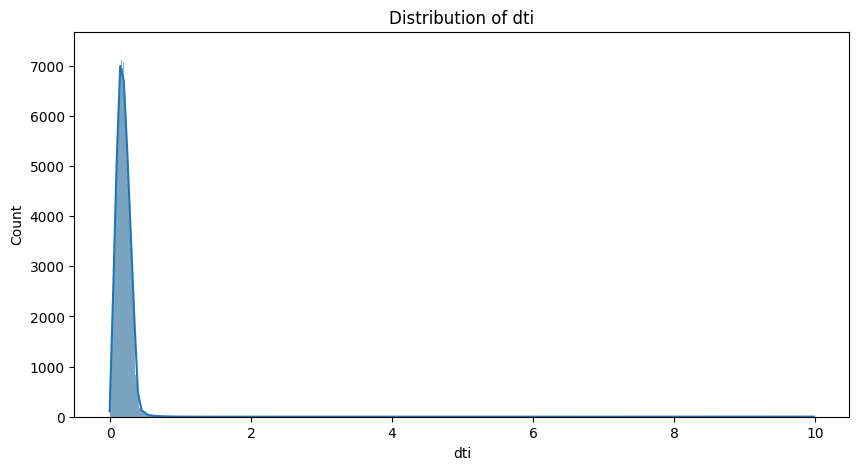

In [35]:
# Distribution plots:
selected_variables = ['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti']

for feature in selected_variables:
    plt.figure(figsize=(10, 5))
    sns.histplot(numerical_features[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


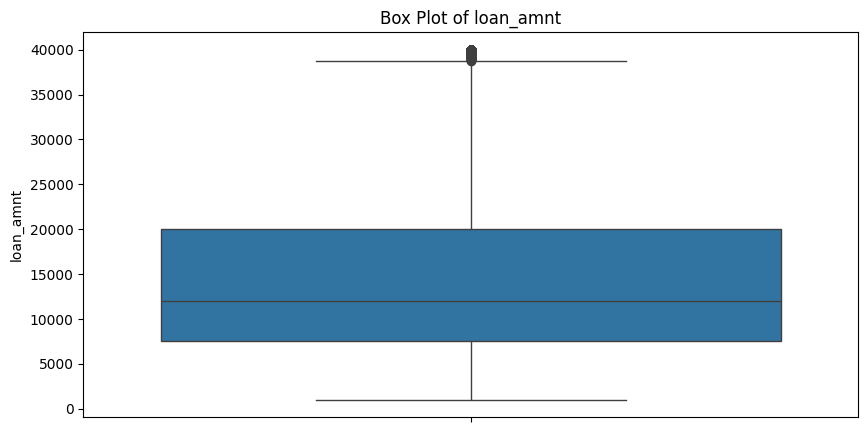

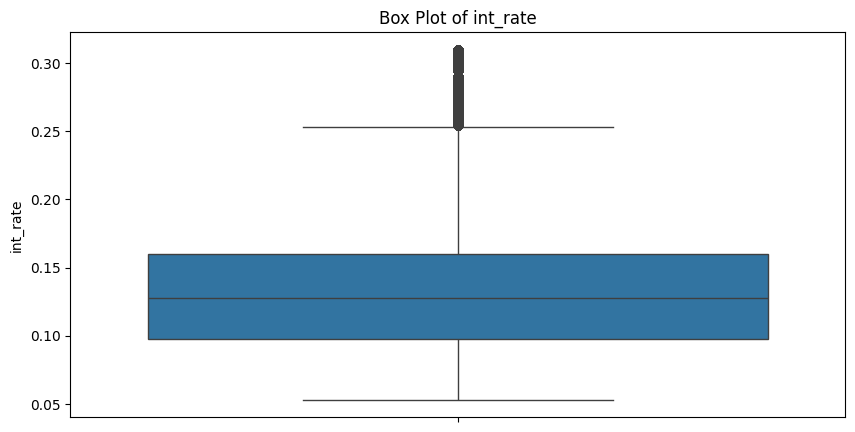

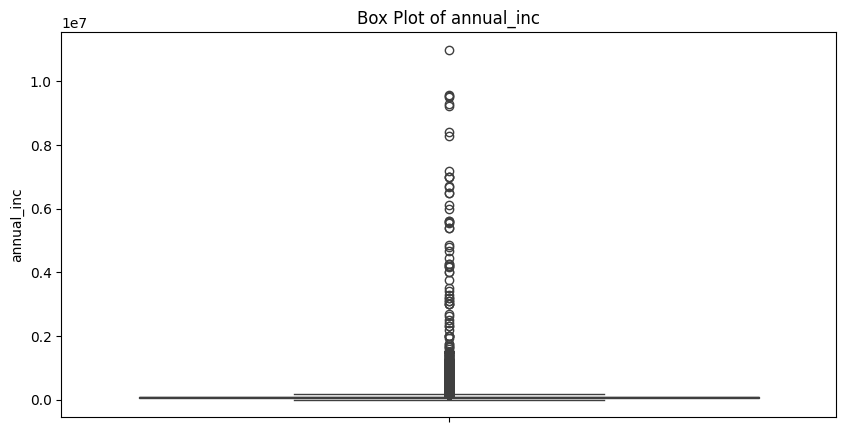

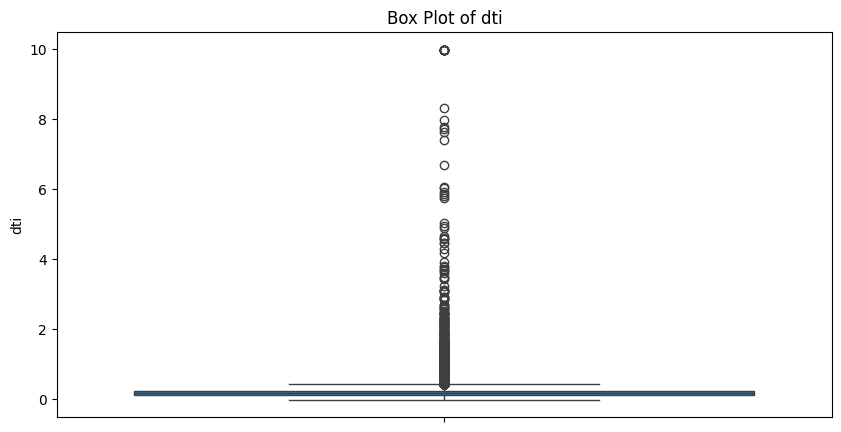

In [34]:
#Box plots:
selected_variables = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']

for feature in selected_variables:
    plt.figure(figsize=(10, 5))
    sns.boxplot(numerical_features[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


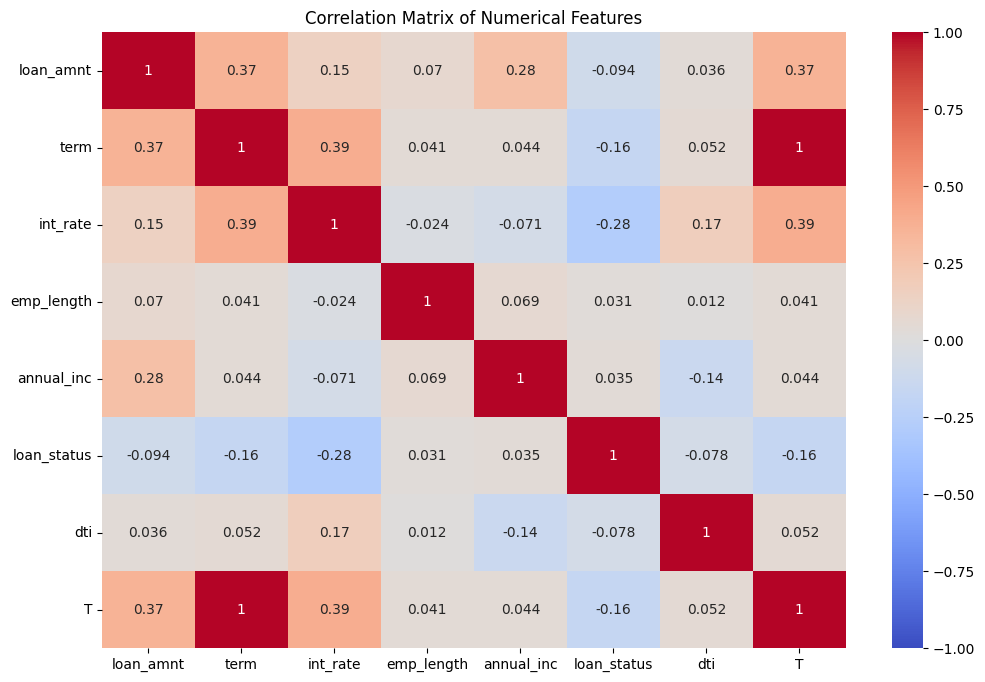

In [37]:
# Correlation matrix:
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

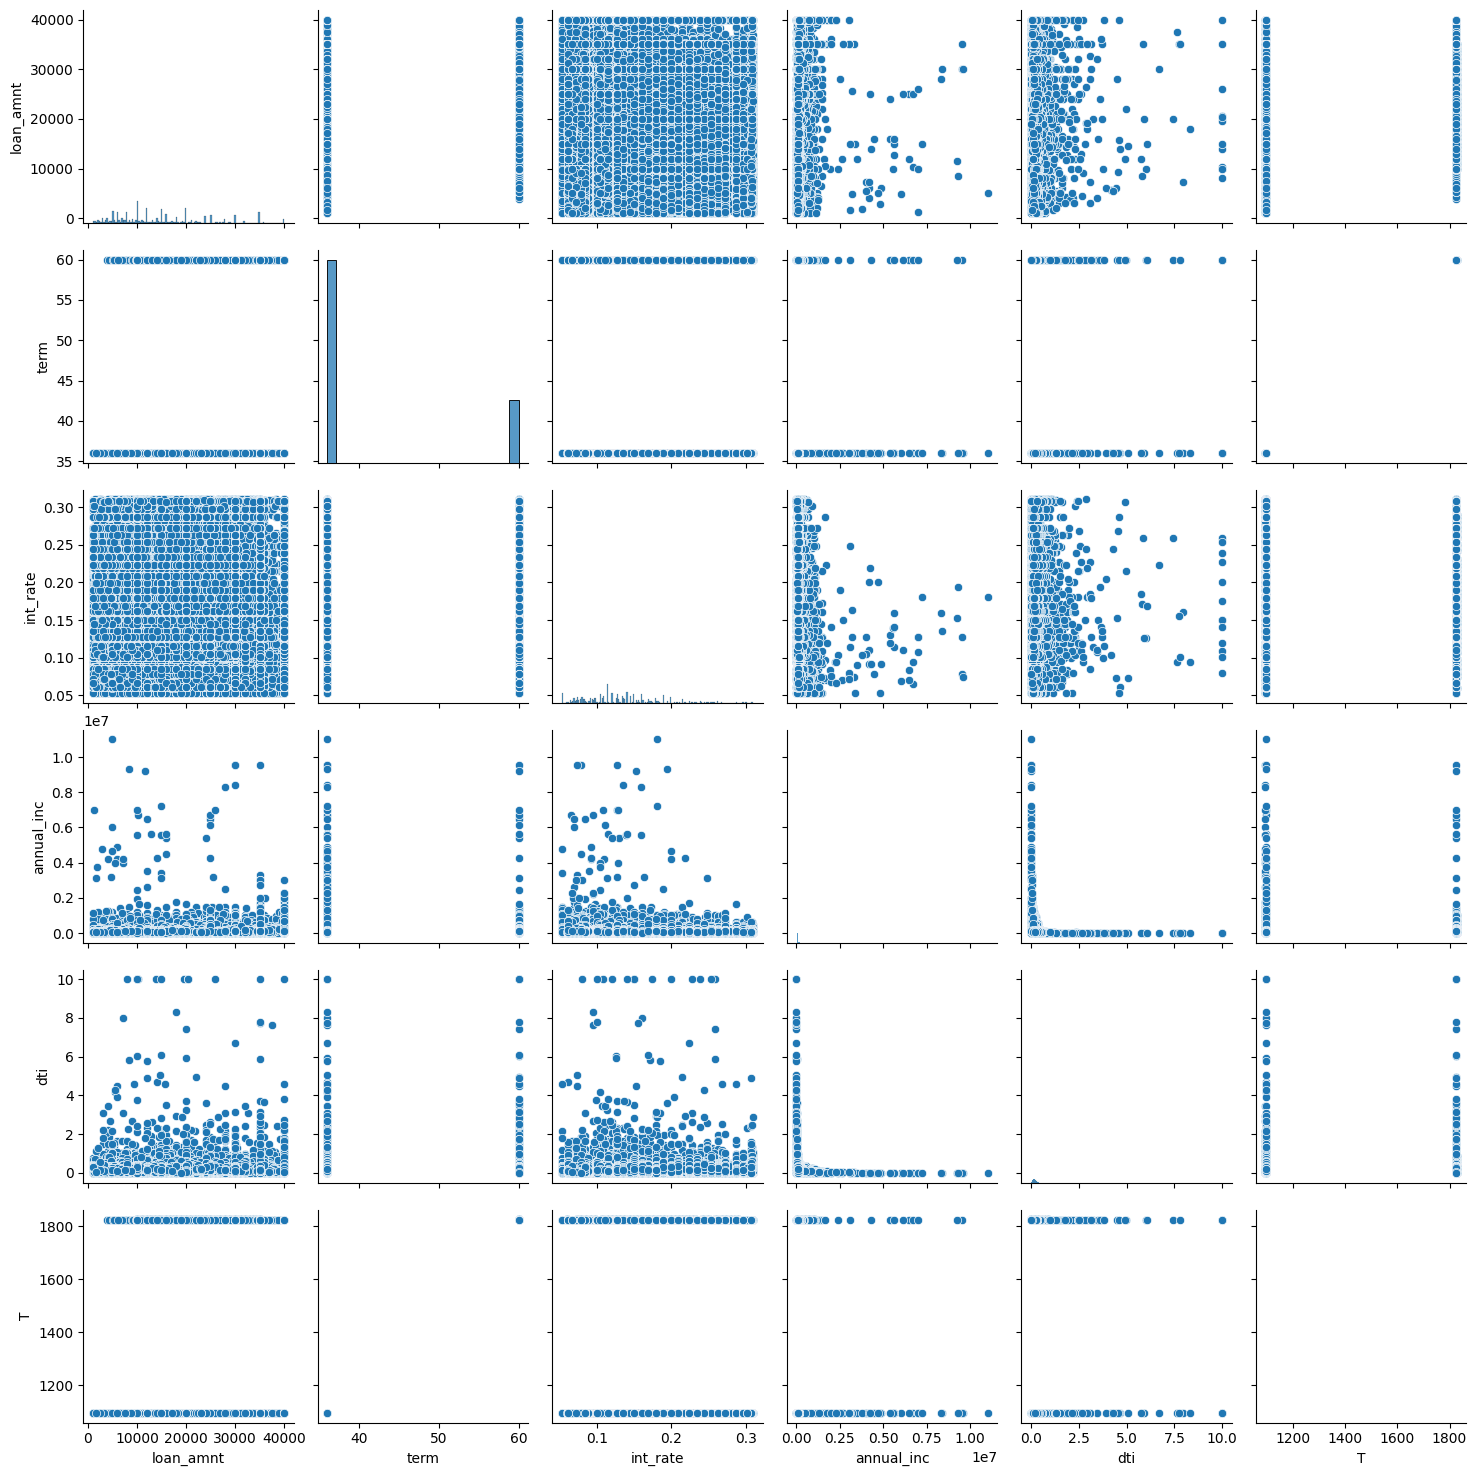

In [44]:
selected_variables = ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'T']

sns.pairplot(numerical_features[selected_variables])
plt.show()

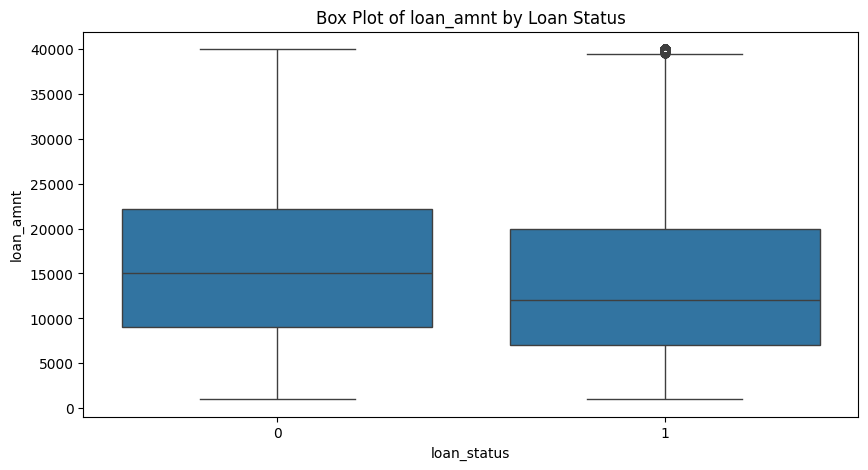

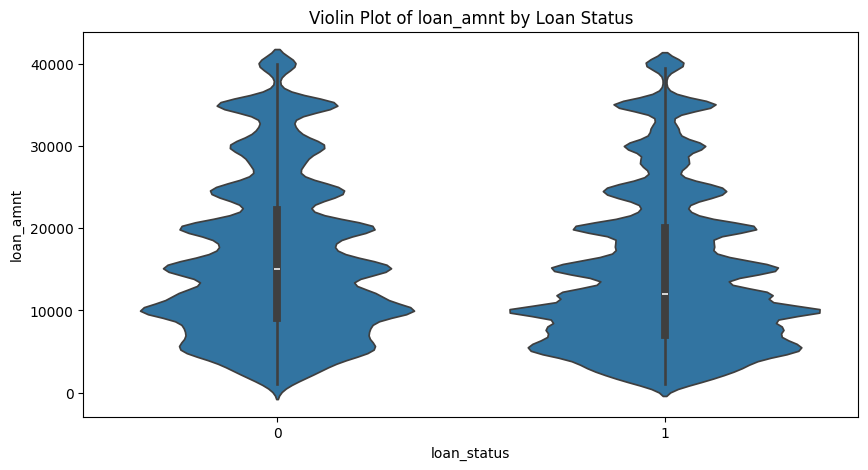

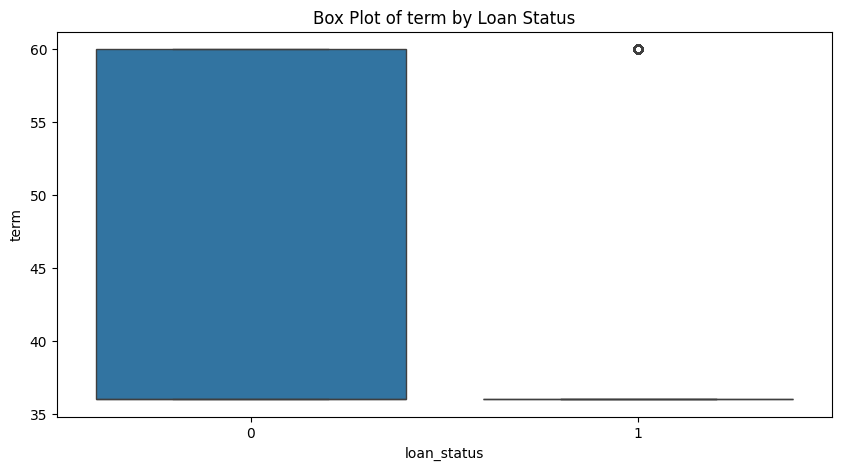

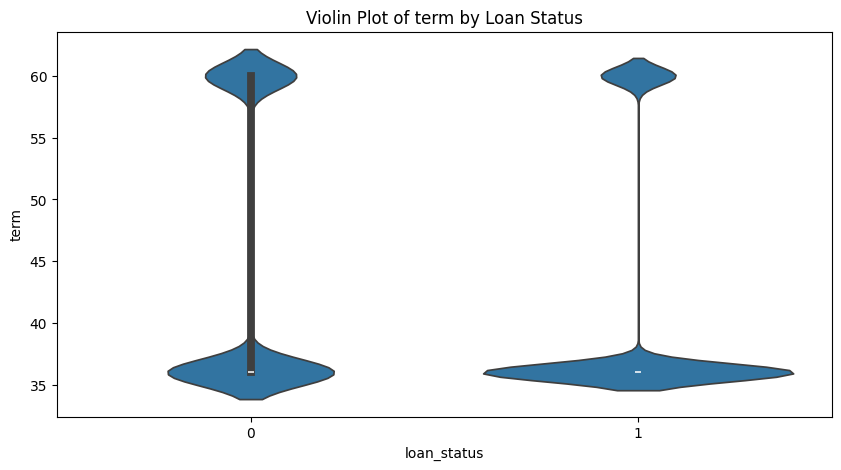

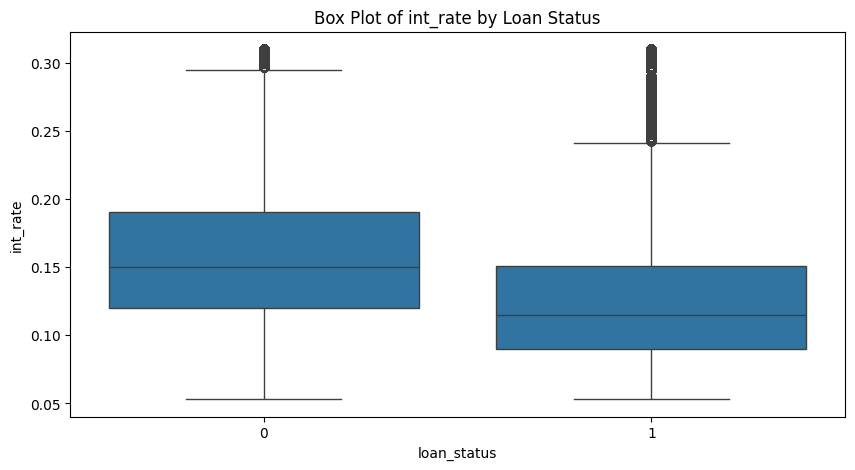

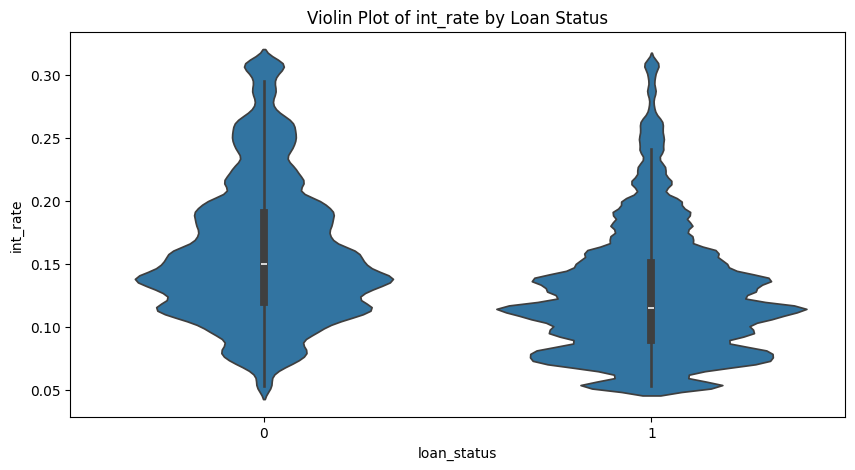

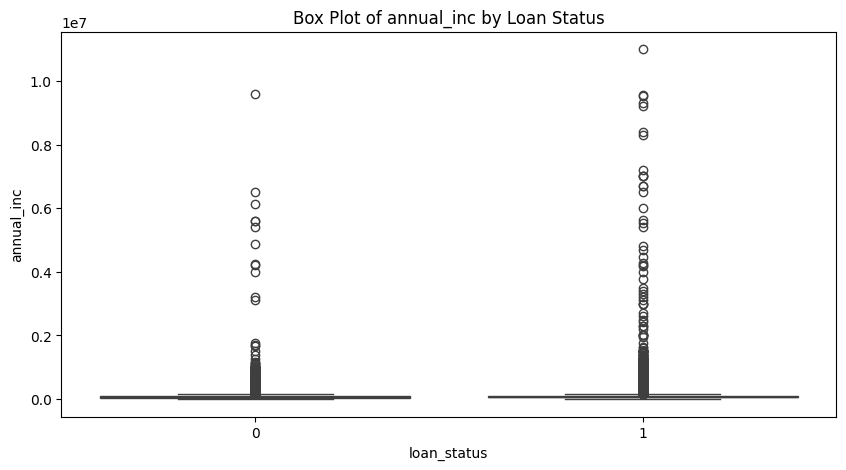

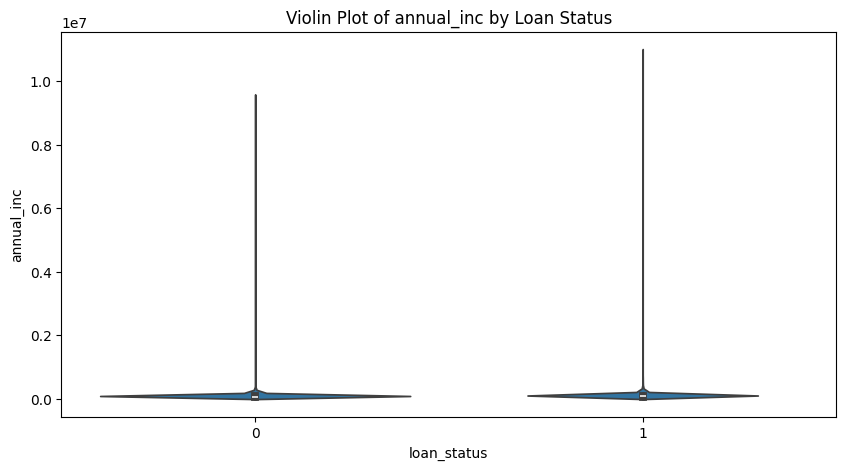

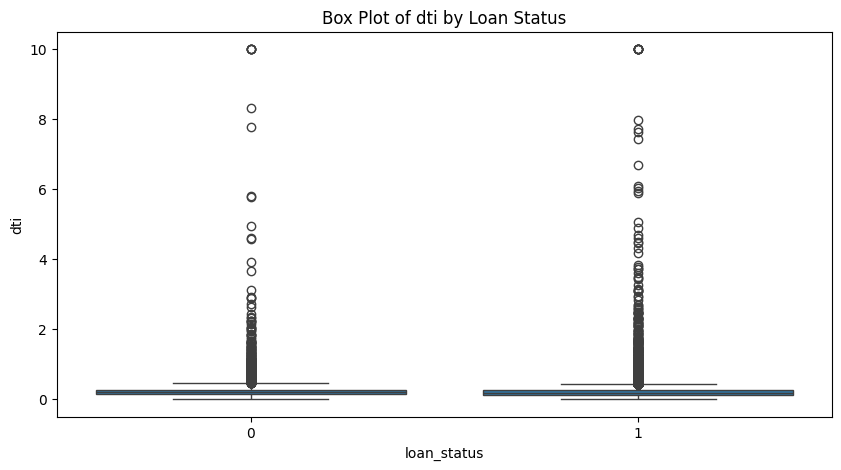

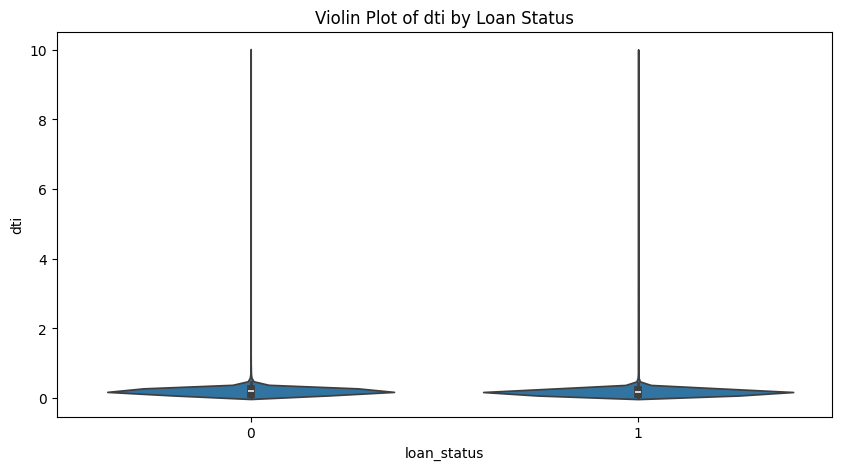

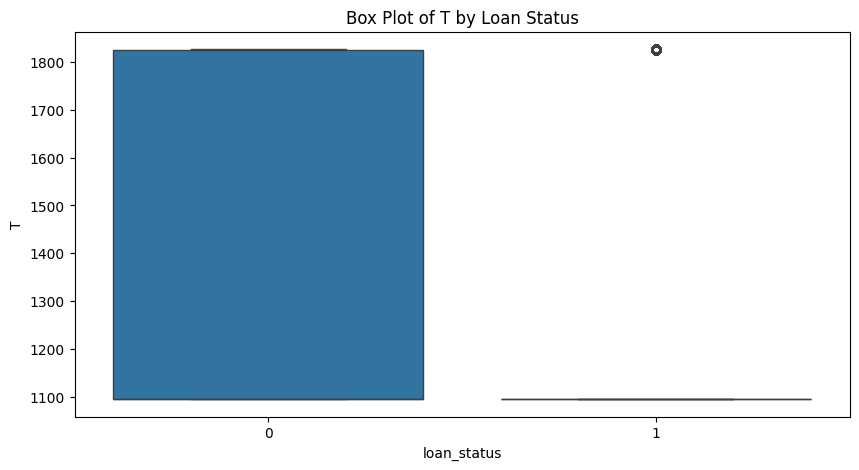

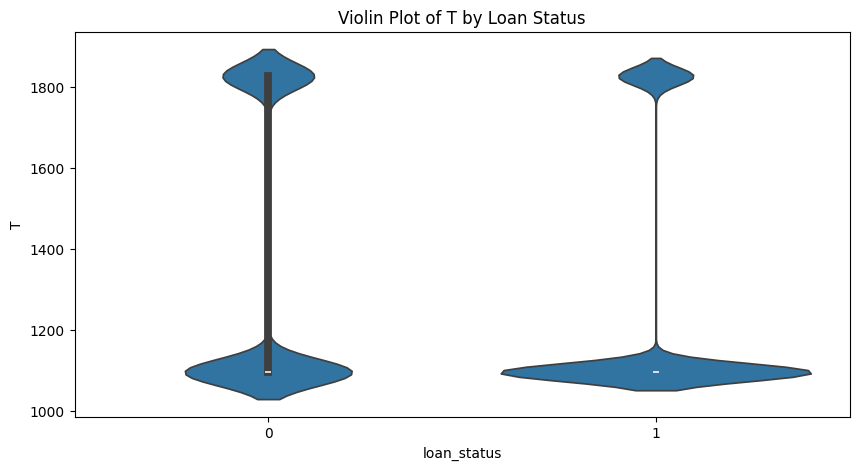

In [48]:
# Target variable analysis:
selected_variables = ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'T']

for feature in numerical_features[selected_variables]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='loan_status', y=feature, data=numerical_features)
    plt.title(f'Box Plot of {feature} by Loan Status')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.violinplot(x='loan_status', y=feature, data=numerical_features)
    plt.title(f'Violin Plot of {feature} by Loan Status')
    plt.show()


In [49]:
numerical_features.T.value_counts()

KeyboardInterrupt: 